In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('german_credit_data.csv')

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [4]:
df.drop(df.columns[0],axis=1,inplace=True)

In [5]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [7]:
print("Database has {} observations (customers) and {} columns (attributes).".format(df.shape[0],df.shape[1]))

Database has 1000 observations (customers) and 9 columns (attributes).


In [8]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [9]:
print("Number of unique values is:\n{}".format(df.nunique()))

Number of unique values is:
Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
dtype: int64


In [11]:
print("Unique values in each categorical column:")
for col in df.select_dtypes(include=[object]):
    print(col,":", df[col].unique())

Unique values in each categorical column:
Sex : ['male' 'female']
Housing : ['own' 'free' 'rent']
Saving accounts : [nan 'little' 'quite rich' 'rich' 'moderate']
Checking account : ['little' 'moderate' nan 'rich']
Purpose : ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


<AxesSubplot:xlabel='Credit amount', ylabel='Duration'>

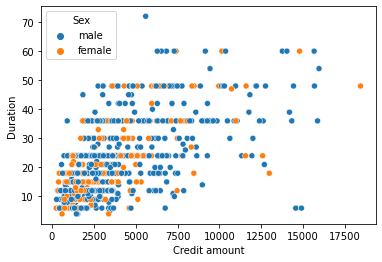

In [12]:
sns.scatterplot(x='Credit amount',y='Duration',hue='Sex',data=df)

<AxesSubplot:xlabel='Credit amount', ylabel='Age'>

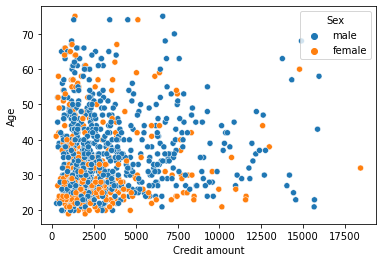

In [13]:
sns.scatterplot(x='Credit amount',y='Age',hue='Sex',data=df)

<AxesSubplot:xlabel='Age', ylabel='Duration'>

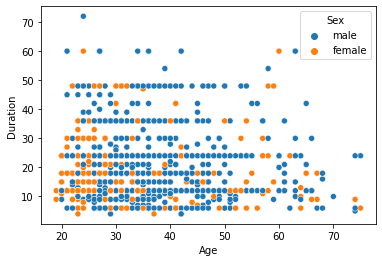

In [14]:
sns.scatterplot(x='Age',y='Duration',hue='Sex',data=df)

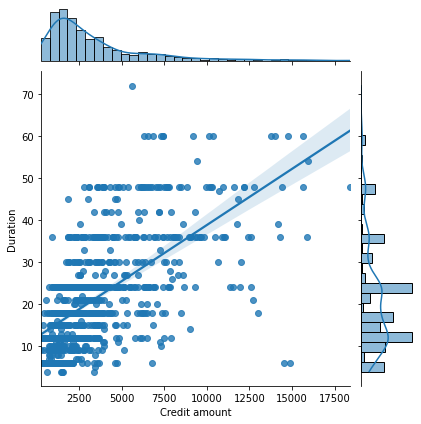

In [16]:
import scipy.stats as stats
r1 = sns.jointplot(x="Credit amount",y="Duration", data=df, kind="reg")
plt.show()

In [ ]:
sns.lmplot(x="Credit amount",y="Duration", hue="Sex", data=df, palette="Set1", aspect=2)
plt.show()

# K-means

In [18]:
#Selecting columns for clusterisation with k-means
cols = ["Age","Credit amount", "Duration"]
cluster_data = df.loc[:,cols]

In [19]:
def distributions(df):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.distplot(df["Age"], ax=ax1)
    sns.distplot(df["Credit amount"], ax=ax2)
    sns.distplot(df["Duration"], ax=ax3)
    plt.tight_layout()

C:\Users\RAUNAK GHOSH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAUNAK GHOSH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAUNAK GHOSH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

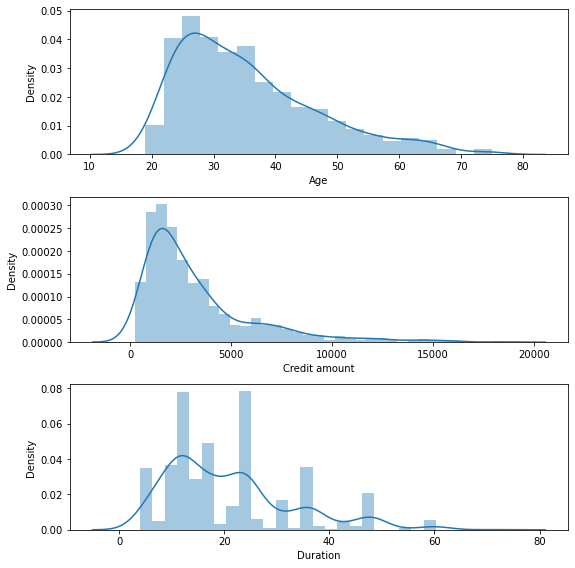

In [20]:
distributions(cluster_data)

#we can see that distributions are right-skewed. To remove skewness we must make use of logarithmic distributions..

C:\Users\RAUNAK GHOSH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAUNAK GHOSH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAUNAK GHOSH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

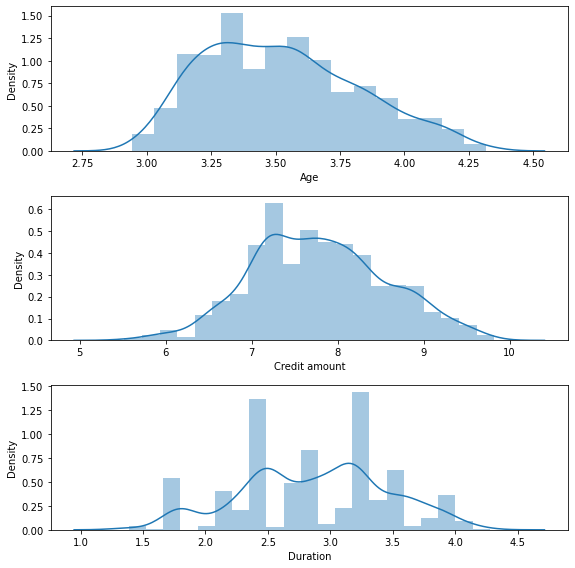

In [21]:
cluster_log = np.log(cluster_data)
distributions(cluster_log)

Indeed the skewness has been eliminated..

In [22]:
cluster_log.head()

,Age,Credit amount,Duration
0,4.204693,7.063904,1.791759
1,3.091042,8.691315,3.871201
2,3.891820,7.647786,2.484907
3,3.806662,8.972337,3.737670
4,3.970292,8.490849,3.178054


In [23]:
from sklearn.preprocessing import StandardScaler

In [25]:
from sklearn.cluster import KMeans

Next step will be to centering and scaling of variables..

In [24]:
sc = StandardScaler()
cluster_scaled = sc.fit_transform(cluster_log)

ELBOW METHOD:-

In [27]:
n_clusters=[2,3,4,5,6,7,8,9]
wcss=[]
for n in n_clusters:
    kmeans=KMeans(n_clusters=n,init='k-means++')
    kmeans.fit(cluster_scaled)
    wcss.append(kmeans.inertia_)

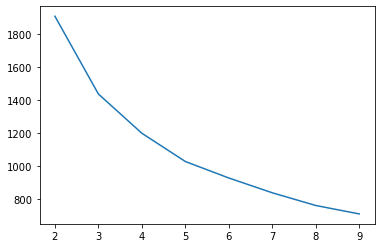

In [28]:
plt.plot(n_clusters,wcss)
plt.show()

In [29]:
kmeans_sel = KMeans(n_clusters=5, random_state=1).fit(cluster_scaled)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)

In [31]:
kmeans=KMeans(n_clusters=5)

In [32]:
y=kmeans.fit_predict(cluster_scaled)

In [33]:
print(y)

[3 0 3 1 1 0 1 0 3 0 2 0 2 3 2 4 1 0 1 4 3 3 3 3 2 3 3 3 2 1 4 4 4 3 2 0 0
 4 3 2 4 2 1 0 1 3 1 2 1 2 4 0 2 4 1 2 1 0 4 0 2 3 1 0 4 1 2 2 4 4 0 3 3 1
 1 3 0 1 0 4 1 3 4 1 3 2 4 1 4 2 3 3 2 4 3 1 3 4 4 0 4 4 2 3 2 0 1 4 0 3 2
 2 0 0 3 1 0 2 0 3 4 1 2 3 4 2 3 2 2 4 0 0 4 3 0 3 0 3 4 3 2 0 4 4 4 0 3 3
 0 3 3 3 0 0 0 2 3 3 1 2 4 4 3 1 4 2 4 2 4 4 2 2 4 2 4 1 3 3 2 3 0 0 4 1 3
 2 1 3 2 4 1 0 1 2 0 2 2 2 4 1 3 2 0 2 3 0 3 2 0 3 2 1 1 1 1 3 4 0 4 3 2 2
 2 4 4 4 0 1 2 4 0 3 3 2 3 4 4 1 3 1 4 3 0 2 4 4 3 2 4 2 3 3 4 4 2 0 4 2 4
 3 2 1 1 3 2 3 0 4 1 4 4 3 0 0 0 2 4 3 2 4 4 3 3 3 1 0 0 0 3 3 2 0 1 1 1 0
 4 3 1 4 3 1 4 3 0 2 0 2 2 2 0 0 4 2 2 4 3 1 2 4 0 4 4 4 3 3 1 4 0 2 1 4 0
 0 4 3 2 2 4 2 0 4 4 4 3 3 2 4 2 2 2 2 4 4 3 4 3 0 2 4 3 4 3 2 4 3 4 4 1 1
 1 0 2 1 1 0 4 3 1 3 4 0 4 2 0 4 2 1 4 2 4 2 1 2 2 0 3 1 3 1 3 4 0 2 1 4 1
 2 4 2 4 0 3 3 4 0 4 0 4 4 4 2 3 4 4 4 4 3 2 3 3 0 3 4 2 2 2 4 1 2 3 2 4 3
 0 3 4 3 3 3 0 2 4 4 0 4 4 4 2 4 1 4 4 3 4 1 4 0 4 0 4 2 2 3 4 4 4 0 3 3 4
 4 1 2 3 3 3 1 3 2 2 1 2 

In [34]:
output=pd.concat([df,pd.DataFrame(y)],axis=1)

In [35]:
output

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,0
0,67,male,2,own,NaN,little,1169,6,radio/TV,3
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,NaN,2096,12,education,3
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,1
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,2
996,40,male,3,own,little,little,3857,30,car,1
997,38,male,2,own,little,NaN,804,12,radio/TV,3
998,23,male,2,free,little,little,1845,45,radio/TV,4


In [36]:
output.rename(columns={0:'Clusters'},inplace=True)

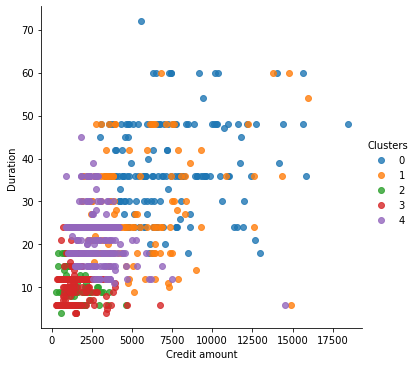

In [37]:
sns.lmplot(data=output,x='Credit amount',y='Duration',hue='Clusters',fit_reg=False)

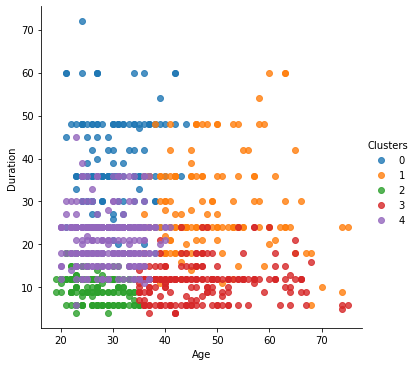

In [38]:
sns.lmplot(data=output,x='Age',y='Duration',hue='Clusters',fit_reg=False)

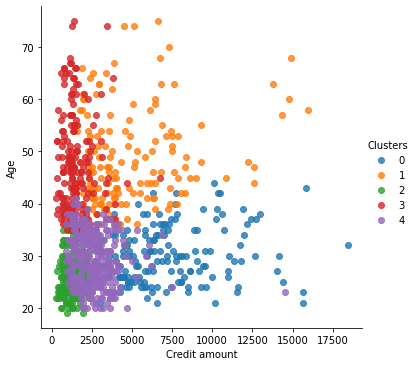

In [39]:
sns.lmplot(data=output,x='Credit amount',y='Age',hue='Clusters',fit_reg=False)